<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
import pandas as pd
import numpy as np

### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [17]:
features=np.array(df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']])

In [ ]:
features

In [22]:
price=np.array(df.price)

In [ ]:
price.size,features.size

In [28]:
bedrooms=np.array(df.bedrooms)

In [ ]:
np.corrcoef(price,bedrooms)[0,1]

In [ ]:
df.price

In [ ]:
features

In [ ]:
np.corrcoef(price,features,rowvar=False)

In [ ]:
#corr 사용하기 #질문 corr coef랑 무슨 차이야???/ ㅡㅡ
Coef_table=df.corr('pearson')
Coef_table 
#max는 sqft_living

In [52]:
Coef_table.loc["price"].drop("price").max()

0.7020350546118009

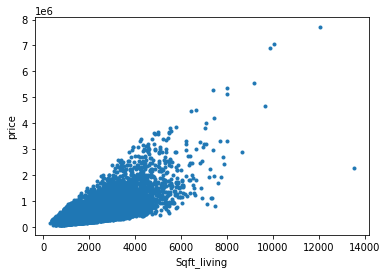

In [63]:
#sqft_living 와 price 시각화.
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
fig=plt.figure()
ax1=fig.add_subplot();
ax1=plt.scatter(x=df['sqft_living'],y=df['price'],s=9);
plt.xlabel('Sqft_living');
plt.ylabel('price');

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###